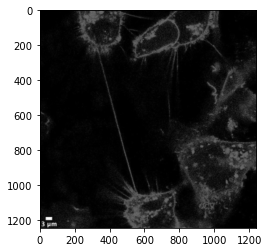

In [163]:
import cv2
img = cv2.imread('img2.png')
if img is None:
    print("Error: Could not read image.")
else:
    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Save the grayscale image
    cv2.imwrite('img2_gray.jpeg', gray)

    # # Display the original and grayscale images
    # cv2.imshow('Original Image', img)
    # cv2.imshow('Grayscale Image', gray)

    # # Wait for a key press and close the windows
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()

# import matplotlib.pyplot as plt
# import cv2
# import numpy as np
# ## find lines in the image cv2

# #kernel = np.ones((5,5),np.float32)/25
# #gray = cv2.filter2D(gray,-1,kernel)
# gray = cv2.GaussianBlur(gray, (5, 5), 1)


# edges = cv2.Canny(gray, 10, 10, apertureSize=3)
# lines = cv2.HoughLinesP(edges, 1, np.pi / 360, threshold=150, minLineLength=10, maxLineGap=10)

# if lines is not None:
#     for line in lines:
#         x1, y1, x2, y2 = line[0]
#         cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)


# #imshow img with lines drawn matploblib
# plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
# plt.axis('off')  # Hide the axes
# plt.show()
# #imshow img with lines drawn matploblib
# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# plt.axis('off')  # Hide the axes
# plt.show()

# ## Save the image with lines drawn
# #cv2.imwrite('img_with_lines.jpeg', img)

plt.imshow(gray,cmap='gray')


(1246, 1242)


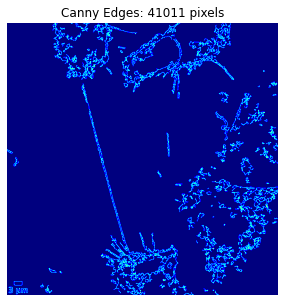

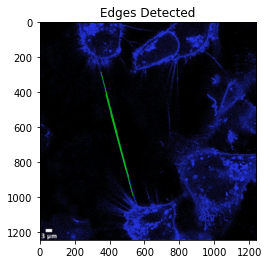

In [164]:
import numpy as np
from matplotlib.cm import get_cmap

def merge_lines(lines, angle_thresh=np.pi/180 * 5, dist_thresh=30):
    if lines is None:
        return []
    merged = []
    for l1 in lines:
        x1, y1, x2, y2 = l1[0]
        angle1 = np.arctan2(y2 - y1, x2 - x1)
        found = False
        for idx, (mx1, my1, mx2, my2) in enumerate(merged):
            angle2 = np.arctan2(my2 - my1, mx2 - mx1)
            if abs(angle1 - angle2) < angle_thresh:
                if (np.hypot(mx1 - x1, my1 - y1) < dist_thresh or
                    np.hypot(mx2 - x2, my2 - y2) < dist_thresh):
                    # Merge lines: just extend the endpoints
                    merged[idx] = (
                        min(mx1, x1), min(my1, y1),
                        max(mx2, x2), max(my2, y2)
                    )
                    found = True
                    break
        if not found:
            merged.append((x1, y1, x2, y2))
    return merged

def detect_TNT(frame, canny_threshold=(5,40)):
    height, width, _ = frame.shape
    # Convert to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
    
    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (3,3), 0)
    
    # Step 2: Edge detection
    edges = cv2.Canny(blurred, *canny_threshold)

    print(edges.shape)
    # Step 3: Visualize edges
    plt.figure(figsize=(10, 5))
    plt.imshow(edges, cmap='jet')
    plt.title(f"Canny Edges: {np.count_nonzero(edges)} pixels")
    plt.axis('off')
    plt.show()
    #remove edges near logo
    #edges[:logo_crop[1],:logo_crop[0]] = 0
    #this looks pretty good with theset setttings
    #return(edges, _)

    # # Create a copy of the original frame
    # output_frame = frame.copy()
    
    # # Step 3: Overlay edges on the original image
    # # Convert edges to a green overlay
    # c_edges = np.zeros_like(output_frame)
    # c_edges[:sky_crop, :, 0] = edges  # Place edges in the red channel
    
    # Combine the green edges with the original frame
    #overlaid_frame = cv2.addWeighted(output_frame, 0.8, c_edges, 1, 0) 
    #return(overlaid_frame,_)

    # Optional: Dilate the edges
    #kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (15,15))
    #dilated = cv2.dilate(edges, kernel, iterations=1)

    # Find contours
    #contours, _ = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    #contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi/180, threshold=80, minLineLength=300, maxLineGap=20)
 
    # Create an output frame for visualization
    overlaid_frame = frame.copy()

    #lines = merge_lines(lines)

    # Draw lines
    #line_img = frame.copy()
    if lines is not None:
        #for x1, y1, x2, y2 in lines:
        #    cv2.line(overlaid_frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
        for x1, y1, x2, y2 in lines[:, 0]:
            cv2.line(overlaid_frame, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # for i, contour in enumerate(contours):
    #     # Normalize the color index to the range of the colormap
    #     color = cmap(i / len(contours))  # Get RGBA color from colormap
    #     color_rgb = tuple(int(255 * c) for c in color[:3])  # Convert to RGB (0-255)
        
    #     # Draw the contour with the assigned color
    #     cv2.drawContours(overlaid_frame, [contour], -1, color_rgb, 2)
        
    return overlaid_frame, edges

frame, contours = detect_TNT(img,canny_threshold=(100, 30),
                            )
plt.imshow(frame)
plt.title(f"Edges Detected")
plt.show()